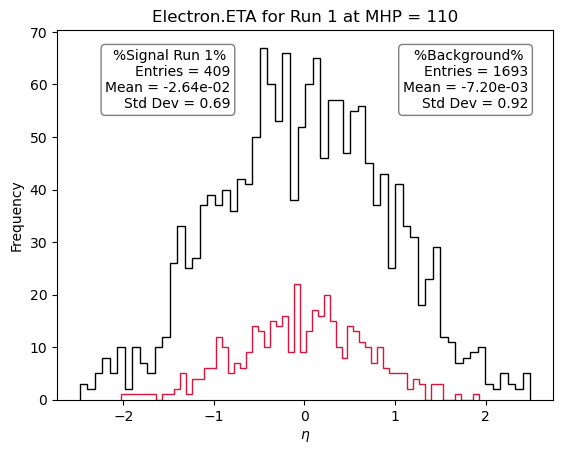

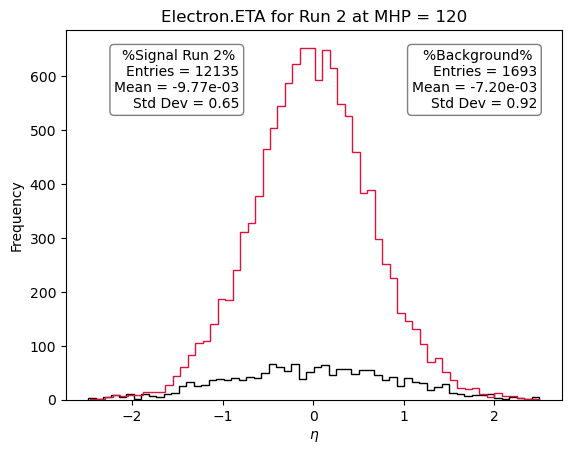

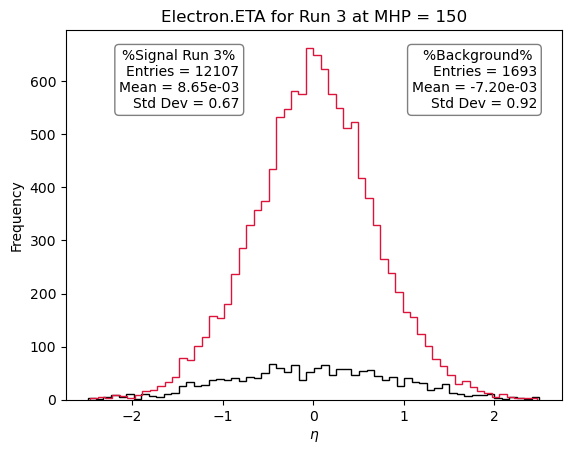

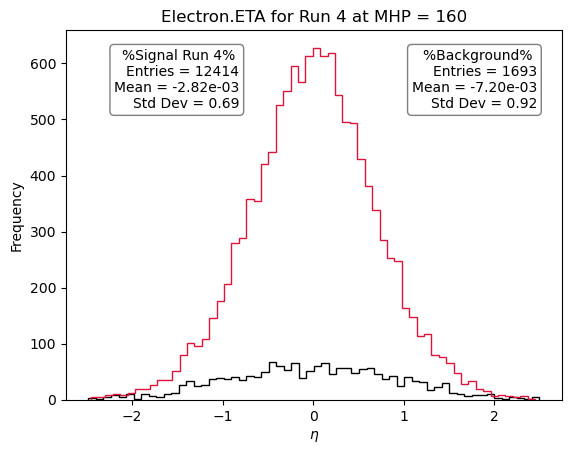

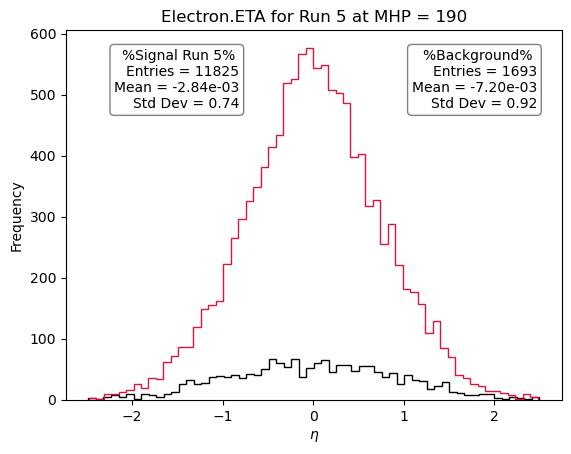

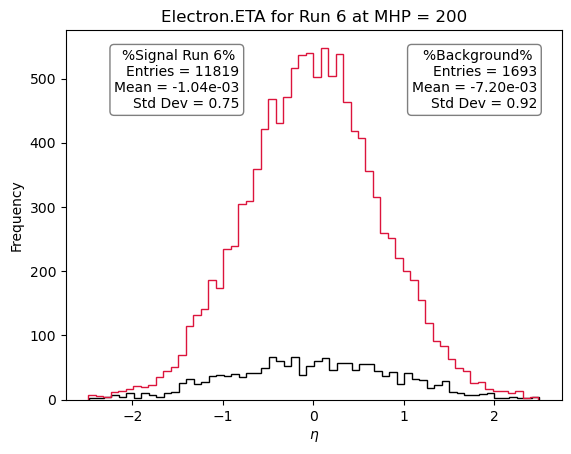

In [2]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

# Open the ROOT file for the constant data
masses = [0,110,120,150,160,190,200]
file = ROOT.TFile.Open("/home/physics/MG5_aMC_v2_9_4/10000Pablo_background_sm/Events/run_01/tag_1_delphes_events.root")

# Check if the file is open
if not file or file.IsZombie():
    print("Error opening file!")
    exit()

# Access the "Delphes" tree inside the ROOT file
tree = file.Get("Delphes")

# Check if the tree exists
if not tree:
    print("Tree 'Delphes' not found in the file!")
    exit()

# Set up a TTreeReader to access the Muon.Eta branch data for the constant data
reader = ROOT.TTreeReader(tree)
muon_pt_reader = ROOT.TTreeReaderArray('float')(reader, "Electron.Eta")

# Create a list to store muon.eta values for the constant data
muon_pts = []

# Loop over the entries in the tree and collect Muon.Eta values
while reader.Next():
    for pt in muon_pt_reader:
        muon_pts.append(pt)

# Convert the list to a NumPy array
muon_pt_array = np.array(muon_pts)

# Close the constant data file
file.Close()

# Data for constant histogram
data = muon_pt_array

# Calculate statistics for constant data
mean = np.mean(data)
std_dev = np.std(data)
entries = len(data)

# Iterate through the 6 runs
for run_num in range(1, 7):
    # Open the ROOT file for the varying data
    file2 = ROOT.TFile.Open(f"/home/physics/MG5_aMC_v2_9_4/10000twoTo6_a_500Gev/Events/run_0{run_num}/tag_1_delphes_events.root")

    # Check if the file is open
    if not file2 or file2.IsZombie():
        print(f"Error opening file for run {run_num}!")
        continue

    # Access the "Delphes" tree inside the ROOT file
    tree2 = file2.Get("Delphes")

    # Check if the tree exists
    if not tree2:
        print(f"Tree 'Delphes' not found in file for run {run_num}!")
        file2.Close()
        continue

    # Set up a TTreeReader to access the Muon.Eta branch data for the varying data
    reader2 = ROOT.TTreeReader(tree2)
    muon_pt_reader2 = ROOT.TTreeReaderArray('float')(reader2, "Electron.Eta")

    # Create a list to store muon.eta values for the varying data
    muon_pts2 = []

    # Loop over the entries in the tree and collect Muon.Eta values
    while reader2.Next():
        for pt2 in muon_pt_reader2:
            muon_pts2.append(pt2)

    # Convert the list to a NumPy array
    muon_pt_array2 = np.array(muon_pts2)

    # Close the file
    file2.Close()

    # Data for varying histogram
    data2 = muon_pt_array2

    # Calculate statistics for varying data
    mean2 = np.mean(data2)
    std_dev2 = np.std(data2)
    entries2 = len(data2)

    # Create a figure and axis for plotting
    fig, ax2 = plt.subplots()

    # Plotting the histograms
    ax2.hist(data, bins=60, edgecolor='black', histtype='step', label="Background")
    ax2.hist(data2, bins=60, edgecolor='crimson', histtype='step', label=f"Signal Run {run_num}")

    # Adding labels and title
    ax2.set_xlabel(r'$\eta$')
    ax2.set_ylabel('Frequency')
    ax2.set_title(f'Electron.ETA for Run {run_num} at MHP = {masses[run_num]}')

    # Adding text box with statistics for background
    textstr = f'%Background% \nEntries = {entries}\nMean = {mean:.2e}\nStd Dev = {std_dev:.2f}'
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax2.text(0.95, 0.95, textstr, transform=ax2.transAxes,
             fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=props)

    # Adding text box with statistics for signal
    textstr2 = f'%Signal Run {run_num}% \nEntries = {entries2}\nMean = {mean2:.2e}\nStd Dev = {std_dev2:.2f}'
    props2 = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax2.text(0.35, 0.95, textstr2, transform=ax2.transAxes,
             fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=props2)

    # Display the plot
    plt.show()
